In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
from statsmodels.stats.stattools import durbin_watson
import scipy.interpolate as spi
import scipy.optimize as spo

import pandas_datareader.data as web
import datetime
import seaborn as sns

In [53]:
def regress(data,yvar,xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y,X).fit()
    return result.params

In [54]:
url = 'https://github.com/selva86/datasets/raw/master/economics.csv'

fin_data = pd.read_csv(url)
fin_data

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
5,1967-12-01,525.8,199657,12.1,4.8,3018
6,1968-01-01,531.5,199808,11.7,5.1,2878
7,1968-02-01,534.2,199920,12.2,4.5,3001
8,1968-03-01,544.9,200056,11.6,4.1,2877
9,1968-04-01,544.6,200208,12.2,4.6,2709


In [55]:
new = fin_data.T
new.label =  np.arange(573)
new

G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
date,1967-07-01,1967-08-01,1967-09-01,1967-10-01,1967-11-01,1967-12-01,1968-01-01,1968-02-01,1968-03-01,1968-04-01,...,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01
pce,507.4,510.5,516.3,512.9,518.1,525.8,531.5,534.2,544.9,544.6,...,11944.4,12017,12044.6,12096.4,12142.2,12122,12080.8,12095.9,12161.5,12158.9
pop,198712,198911,199113,199311,199498,199657,199808,199920,200056,200208,...,319133,319354,319588,319804,320013,320201,320367,320534,320707,320887
psavert,12.5,12.5,11.7,12.5,12.5,12.1,11.7,12.2,11.6,12.2,...,5.1,4.7,4.6,4.6,4.5,5,5.5,5.7,5.2,5.6
uempmed,4.5,4.7,4.6,4.9,4.7,4.8,5.1,4.5,4.1,4.6,...,13.5,13.3,13.3,13.5,12.8,12.6,13.4,13.1,12.2,11.7
unemploy,2944,2945,2958,3143,3066,3018,2878,3001,2877,2709,...,9648,9568,9237,8983,9071,8688,8979,8705,8575,8549


In [56]:
import pandas_datareader.data as web
import datetime
symbol = 'WIKI/AAPL'
#df = web.DataReader(symbol,'quandl','2019-01-01','2019-03-05')
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
#f = web.DataReader('F', ‘yahoo’, start, end)
AAPL = web.get_data_yahoo('AAPL')

In [60]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.307869
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.342979
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.019398
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,19.982389
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.115240
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,19.937790
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.710993
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,19.989031
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,19.873259


In [57]:
df = np.random.randn(900).reshape(3,300)
sb = pd.DataFrame(df).T

In [58]:
sb.columns = ['GOOG','AAPL','SPX']

In [72]:
sb

,GOOG,AAPL,SPX
0,1.391851,-0.652312,0.719444
1,-0.839382,1.427372,1.115196
2,0.618186,-0.115885,0.937048
3,-0.357048,0.603923,0.763514
4,-0.582322,-0.426899,0.114667
5,-1.340623,0.450663,-0.100793
6,-1.443259,0.004677,-0.392160
7,1.138835,0.692974,-0.838022
8,0.009270,0.141546,-2.560310
9,-0.477300,-0.998977,0.966163


In [59]:
ret = sb.pct_change().dropna()
ret

,GOOG,AAPL,SPX
1,0.015240,-0.741327,-3.220658
2,-2.532596,1.259463,-1.907657
3,-0.915294,-2.906845,-1.258207
4,-3.821369,-0.808813,2.807867
5,1.515511,1.354684,-1.620046
6,-1.154649,-0.399316,-3.236023
7,-4.244849,-5.281450,-0.553635
8,2.937215,-1.174186,0.869863
9,-1.540341,5.238290,-0.458545
10,-1.104049,-1.251979,1.265150


In [49]:
by_m = ret.groupby(lambda x :x.month)
#by_m.month

AttributeError: 'int' object has no attribute 'month'

In [50]:
ret.apply(regress,'GOOG',['SPX','AAPL'])

NameError: name 'regress' is not defined

In [4]:
nsample = 50
x = np.linspace(0,20,nsample)
X = np.column_stack((x,(x - 5)**2))
X = sm.add_constant(X)
beta = [5.,0.5,-0.01]
sig = 0.5
w = np.ones(nsample)
w[nsample * 6//10:] = 3
y_true = np.dot(X,beta)
e = np.random.normal(size = nsample)
y = y_true + sig * w * e
X = X[:,[0,1]]

In [5]:
mod = sm.OLS(y,X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.17e-19
Time:                        16:41:19   Log-Likelihood:                -76.069
No. Observations:                  50   AIC:                             156.1
Df Residuals:                      48   BIC:                             160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2715      0.315     16.731      0.000       4.638       5.905
x1             0.4052      0.027     14.925      0.000       0.351       0.460
==============================================================================
Omnibus:                        8.959   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.927
Skew:                          -0.661   Prob(JB):                      0.00699
Kurtosis:                       4.737   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
mod_wls = sm.WLS(y,X,weight = 1./w)
res_wls = mod_wls.fit()
res_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            WLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.17e-19
Time:                        16:41:21   Log-Likelihood:                -76.069
No. Observations:                  50   AIC:                             156.1
Df Residuals:                      48   BIC:                             160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2715      0.315     16.731      0.000       4.638       5.905
x1             0.4052      0.027     14.925      0.000       0.351       0.460
==============================================================================
Omnibus:                        8.959   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.927
Skew:                          -0.661   Prob(JB):                      0.00699
Kurtosis:                       4.737   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
durbin_watson(res_wls.resid)#2完全无关，0正相关，4负相关

2.038640826334038

In [60]:
from statsmodels.distributions.empirical_distribution import ECDF

In [70]:
ecdf = ECDF(sb['GOOG'])

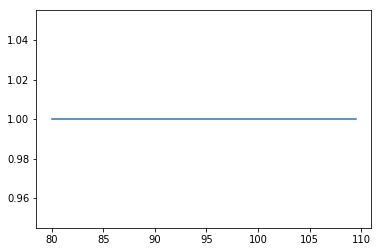

In [79]:
from pylab import *
plot(np.arange(80,110,0.5),ecdf(np.arange(80,110,0.5)))

In [80]:
from datetime import datetime

In [83]:
now = datetime.now()
now

datetime.datetime(2019, 6, 16, 12, 31, 23, 646554)

In [91]:
delta = datetime(2019,2,3) - datetime(2018,9,23,8,15)
delta

datetime.timedelta(days=132, seconds=56700)

In [89]:
delta.days

142

In [90]:
delta.seconds

56700

In [92]:
stamp = datetime(2019,2,2)
str(stamp)

'2019-02-02 00:00:00'

In [95]:
stamp.strftime('%Y-%m-%d')

'2019-02-02'

In [96]:
datestrs =['2011-03-23','2001-09-12','2003-03-17']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-03-23', '2001-09-12', '2003-03-17'], dtype='datetime64[ns]', freq=None)

In [105]:
frame = pd.DataFrame(np.random.randn(2,4),index = pd.date_range('1/1/2000',periods = 2,freq = 'W-WED'),
                     columns = ['Colorado','Texas','New York','Ohio'])

In [106]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.111251,-0.816853,-0.879791,0.620046
2000-01-12,0.370509,-0.546420,-0.615302,1.883780


In [108]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.111251,-0.816853,-0.879791,0.620046
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.370509,-0.546420,-0.615302,1.883780


In [110]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.111251,-0.816853,-0.879791,0.620046
2000-01-06,-0.111251,-0.816853,-0.879791,0.620046
2000-01-07,-0.111251,-0.816853,-0.879791,0.620046
2000-01-08,-0.111251,-0.816853,-0.879791,0.620046
2000-01-09,-0.111251,-0.816853,-0.879791,0.620046
2000-01-10,-0.111251,-0.816853,-0.879791,0.620046
2000-01-11,-0.111251,-0.816853,-0.879791,0.620046
2000-01-12,0.370509,-0.546420,-0.615302,1.883780


In [8]:
frame = pd.DataFrame(np.random.randn(2,4),index = pd.date_range('1/1/2000',periods = 2,freq = 'A'),
                              columns=['Colotado','Texas','New York','Ohio'])
frame

,Colotado,Texas,New York,Ohio
2000-12-31,0.053555,-0.133639,-0.707634,1.324744
2001-12-31,-0.963934,-0.583217,0.890541,0.376876


In [50]:
frame.resample('Q-DEC').ffill()

,Colotado,Texas,New York,Ohio
2000-12-31,0.053555,-0.133639,-0.707634,1.324744
2001-03-31,0.053555,-0.133639,-0.707634,1.324744
2001-06-30,0.053555,-0.133639,-0.707634,1.324744
2001-09-30,0.053555,-0.133639,-0.707634,1.324744
2001-12-31,-0.963934,-0.583217,0.890541,0.376876


In [40]:
import pandas_datareader
#pandas_datareader.quandl.QuandlReader(symbols='AAPL', start='1/1/2010', end='1/1/2011')
#pandas_datareader.nasdaq_trader.get_nasdaq_symbols(retry_count=3, timeout=30, pause=None)
start='1/1/2010'
end='1/1/2011'
f = web.DataReader('F', 'google', start, end)

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [78]:
import pandas_datareader.data as web
symbol = 'WIKI/AAPL'
df = web.DataReader(symbol,data_source='quandl',start='2015-01-01', end='2017-03-15',
                    access_key ='RGqizhsWNp9P1gM7wx5u')

In [6]:
df

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-03-15,139.410,140.7501,139.0250,140.460,25691774.0,0.00,1.0,138.280759,139.610004,137.898878,139.322254,25691774.0
2017-03-14,139.300,139.6500,138.8400,138.990,15309065.0,0.00,1.0,138.171650,138.518815,137.715376,137.864161,15309065.0
2017-03-13,138.850,139.4300,138.8200,139.200,17421717.0,0.00,1.0,137.725295,138.300597,137.695538,138.072460,17421717.0
2017-03-10,139.250,139.3571,138.6400,139.140,19612801.0,0.00,1.0,138.122055,138.228288,137.516996,138.012946,19612801.0
2017-03-09,138.740,138.7900,137.0500,138.680,22155904.0,0.00,1.0,137.616186,137.665781,135.939876,137.556672,22155904.0
2017-03-08,138.950,139.8000,138.8200,139.000,18707236.0,0.00,1.0,137.824485,138.667600,137.695538,137.874080,18707236.0
2017-03-07,139.060,139.9800,138.7900,139.520,17446297.0,0.00,1.0,137.933594,138.846142,137.665781,138.389868,17446297.0
2017-03-06,139.365,139.7700,138.5959,139.340,21750044.0,0.00,1.0,138.236124,138.637843,137.473254,138.211326,21750044.0
2017-03-03,138.780,139.8300,138.5900,139.780,21571121.0,0.00,1.0,137.655862,138.697357,137.467401,138.647762,21571121.0


In [79]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-03-15,139.41,140.7501,139.025,140.46,25691774.0,0.0,1.0,138.280759,139.610004,137.898878,139.322254,25691774.0
2017-03-14,139.30,139.6500,138.840,138.99,15309065.0,0.0,1.0,138.171650,138.518815,137.715376,137.864161,15309065.0
2017-03-13,138.85,139.4300,138.820,139.20,17421717.0,0.0,1.0,137.725295,138.300597,137.695538,138.072460,17421717.0
2017-03-10,139.25,139.3571,138.640,139.14,19612801.0,0.0,1.0,138.122055,138.228288,137.516996,138.012946,19612801.0
2017-03-09,138.74,138.7900,137.050,138.68,22155904.0,0.0,1.0,137.616186,137.665781,135.939876,137.556672,22155904.0


In [80]:
df =df.sort_index()

In [98]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,53204626.0,0.0,1.0,105.820966,105.868466,101.982949,103.863957,53204626.0
2015-01-05,108.29,108.65,105.410,106.25,64285491.0,0.0,1.0,102.875953,103.217954,100.139941,100.937944,64285491.0
2015-01-06,106.54,107.43,104.630,106.26,65797116.0,0.0,1.0,101.213446,102.058949,99.398938,100.947444,65797116.0
2015-01-07,107.20,108.20,106.695,107.75,40105934.0,0.0,1.0,101.840448,102.790453,101.360696,102.362951,40105934.0
2015-01-08,109.23,112.15,108.700,111.89,59364547.0,0.0,1.0,103.768957,106.542969,103.265455,106.295968,59364547.0


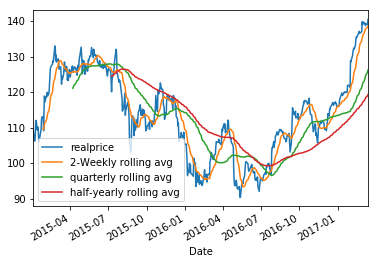

In [81]:
df['Close'].plot()
df['Close'].rolling(16).mean().plot()
#df['Close'].rolling(32).mean().plot()
df['Close'].rolling(65).mean().plot()
df['Close'].rolling(65*2).mean().plot()
plt.legend(['realprice',
            '2-Weekly rolling avg',
            #'monthly rolling avg',
            'quarterly rolling avg'
            ,'half-yearly rolling avg'])


In [38]:
df['Close'].plot()
df['Close'].rolling(65).mean().plot()
df['Close'].ewm(span=30).mean().plot()
plt.legend(['realprice','quarterly rolling avg','exponential moving avg'])

df['Close'].rolling(65).mean().plot()
df['Close'].rolling(65).apply(lambda x : np.percentile(x,5)).plot()
plt.legend (['realprice','EMA for 95% minimium'])

NameError: name 'df' is not defined

G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


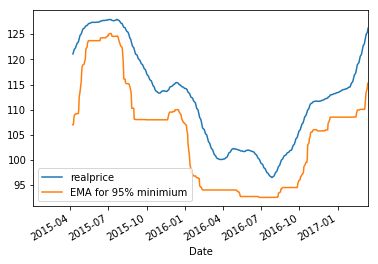

In [19]:
df['Close'].rolling(65).mean().plot()
df['Close'].rolling(65).apply(lambda x : np.percentile(x,5)).plot()
plt.legend (['realprice','EMA for 95% minimium'])


In [6]:
#ARMA
values = [4,4]
N = 1000
b0 = 0.8
b1 = -0.4
noise = np.random.normal(0,0.1,N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i] #AR(2)
    values.append(new_x)

In [7]:
values

[4,
 4,
 1.5765305911927243,
 -0.48765414249989136,
 -1.1141183993496269,
 -0.8145093684376338,
 -0.38940449158997,
 0.03879224626955029,
 0.0835715169433442,
 0.27560080013960525,
 0.3908234689433949,
 0.2016656389918139,
 0.037567328890703515,
 0.12036418249254593,
 -0.1392245924377576,
 -0.1264883460780875,
 -0.11503929765160037,
 -0.060747003019920566,
 0.0281963500381139,
 0.009247867348533868,
 -0.03587545440155785,
 -0.14626923197494154,
 -0.2911549526429248,
 -0.10420430790247735,
 0.05800790008299772,
 0.006527293879756535,
 0.1133720647314434,
 0.06972529483870102,
 -0.052709977795576256,
 -0.04302420237540269,
 -0.058235075131814085,
 0.06963202947991742,
 -0.01696201156673252,
 -0.20442238413560443,
 -0.22774691869132768,
 -0.08556736726644101,
 0.05102611838816022,
 0.00909449860857385,
 0.12204185929193109,
 0.11757264174017214,
 0.05269635859160771,
 -0.12827744759374698,
 -0.11415826675352406,
 -0.07359063912557645,
 0.04456571709816808,
 0.08043634282432724,
 -0.077476

In [31]:
MAXLAGS = 5
model = sm.tsa.AR(values)
result = model.fit(MAXLAGS)
result.params

array([-0.00196776,  0.88254078, -0.43529935,  0.02990989, -0.00378167,
       -0.00687872])

In [37]:
MAXLAGS = 2
model = sm.tsa.AR(values)
result = model.fit(MAXLAGS)
result.params

array([-0.0023154 ,  0.85476092, -0.43078447])

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

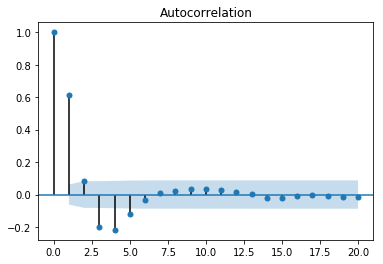

In [11]:
acf =plot_acf(values,lags = 20)

In [13]:
statsmodels.tsa.arima_process.ArmaProcess(ar,ma,nob = 100)#创建

NameError: name 'ar' is not defined

In [ ]:
statsmodels.tsa.arima_model.ARMA(endog,order,exog = None,dates = None,freq=None,missing='none')#拟合

In [5]:
import statsmodels.api as sm
sm.tsa.arima_process.ArmaProcess(AR,ma,nbs=100)

AttributeError: module 'statsmodels.tsa.api' has no attribute 'arima_process'

In [17]:
statsmodels.tsa.kalmanf.kalmanfilter.KalmanFilter #卡尔曼滤波实现

statsmodels.tsa.kalmanf.kalmanfilter.KalmanFilter

In [29]:
import scipy.interpolate as spi
x = np.linspace(-2 *np.pi,2*np.pi,25)

In [35]:
def f(x):
    return np.sin(x) + 0.5 * x

In [37]:
f(x)

array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
       -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
       -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
        1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
        1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265])

In [49]:
ipo = spi.splrep(x,f(x), k = 1)
iy = spi.splev(x,ipo)

Text(0, 0.5, 'f(x)')

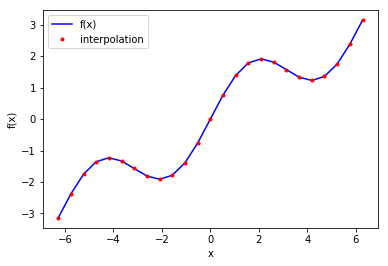

In [52]:
plt.plot(x,f(x),'b',label = 'f(x)')
plt.plot(x,iy,'r.',label = 'interpolation')
plt.legend(loc = 0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

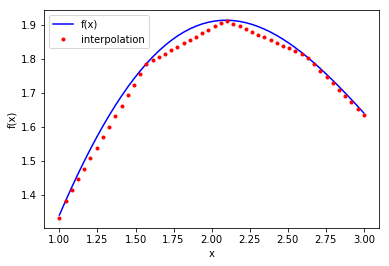

In [55]:
xd = np.linspace(1.0,3.0,50)
iyd = spi.splev(xd,ipo)
plt.plot(xd,f(xd),'b',label = 'f(x)')
plt.plot(xd,iyd,'r.',label = 'interpolation')
plt.legend(loc = 0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'y')

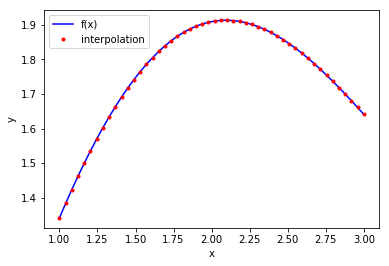

In [62]:
ipo = spi.splrep(x,f(x),k = 3)#cube spline
iyd = spi.splev(xd,ipo)
plt.plot(xd,f(xd),'b',label = 'f(x)')
plt.plot(xd,iyd,'r.',label = 'interpolation')
plt.legend(loc = 0)
plt.xlabel('x')
plt.ylabel('y')

In [12]:
import scipy.optimize as spo

In [5]:
def fo(xy):
    x, y = xy
    z = np.sin(x) + 0.05*x**2 + np.sin(y) + 0.05*y**2
    if output == True:
        print(x, y, z)
    return z

In [11]:
output = True
#spo.brute(fo,((-10,10.1,5),(-10,10.1,5)),finish = None)
rranges = (slice(-10, 10.1, 5), slice(-10, 10.1, 5))

opt1 =spo.brute(fo, rranges, finish=None)
opt1

-10.0 -10.0 11.088042221778739
-10.0 -10.0 11.088042221778739
-10.0 -5.0 7.752945385552508
-10.0 0.0 5.5440211108893696
-10.0 5.0 5.835096836226231
-10.0 10.0 10.0
-5.0 -10.0 7.752945385552509
-5.0 -5.0 4.417848549326277
-5.0 0.0 2.2089242746631386
-5.0 5.0 2.5
-5.0 10.0 6.664903163773769
0.0 -10.0 5.5440211108893696
0.0 -5.0 2.2089242746631386
0.0 0.0 0.0
0.0 5.0 0.29107572533686155
0.0 10.0 4.4559788891106304
5.0 -10.0 5.835096836226231
5.0 -5.0 2.5
5.0 0.0 0.29107572533686155
5.0 5.0 0.5821514506737231
5.0 10.0 4.747054614447491
10.0 -10.0 10.0
10.0 -5.0 6.664903163773769
10.0 0.0 4.4559788891106304
10.0 5.0 4.747054614447492
10.0 10.0 8.911957778221261


array([0., 0.])

In [12]:
output = False
rranges = (slice(-10, 10.1, 0.1), slice(-10, 10.1, 0.1))#smaller step

opt1 =spo.brute(fo, rranges, finish=None)
opt1

array([-1.4, -1.4])

In [17]:
output = True
opt2 = spo.fmin(fo,opt1,xtol = 0.001 , ftol = 0.001, maxiter=15,maxfun = 20)
opt2

-1.4000000000000004 -1.4000000000000004 -1.7748994599769203
-1.4700000000000004 -1.4000000000000004 -1.774329079766041
-1.4000000000000004 -1.4700000000000004 -1.7743290797660412
-1.3300000000000003 -1.4700000000000006 -1.7695827276986251
-1.4350000000000005 -1.4175000000000004 -1.7756403866946224
-1.4350000000000005 -1.3475000000000004 -1.7722175692069706
-1.4087500000000004 -1.4393750000000005 -1.7754569915832503
-1.4437500000000005 -1.4568750000000006 -1.7751135039067365
-1.4328125000000007 -1.4426562500000006 -1.7755861787931349
-1.4590625000000008 -1.4207812500000006 -1.7751589553124218
-1.4213281250000005 -1.4347265625000005 -1.7756764959744498
-1.4235156250000003 -1.4095703125000005 -1.7755407435528803
-1.4304882812500006 -1.4343847656250006 -1.775695506287223
-1.4168164062500006 -1.4516113281250007 -1.7753471595488823
-1.4304541015625005 -1.4260278320312505 -1.7757197974424463
-1.4396142578125009 -1.4256860351562504 -1.77564443394365
-1.4258996582031256 -1.4324664306640629 -1.7

array([-1.42702972, -1.42876755])

In [15]:
output = False
spo.fmin(fo,(2.0,2.0),maxiter = 250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [19]:
from math import sqrt
def Eu((s,b)):#双括号啥的

SyntaxError: invalid syntax (<ipython-input-19-2a2d96793115>, line 2)

In [20]:
import scipy.integrate as sci

In [22]:
def f(x):
    return np.sin(x) +x**2

In [23]:
a = 0.5#下限
b = 0.9#上限
x = np.linspace(0,10)
y = f(x)

In [27]:
sci.fixed_quad(f,a,b)[0]

0.4573059269530417

In [28]:
sci.quad(f,a,b)[0]

0.45730592695304156

In [31]:
sci.romberg(f,a,b)

0.45730592695307565

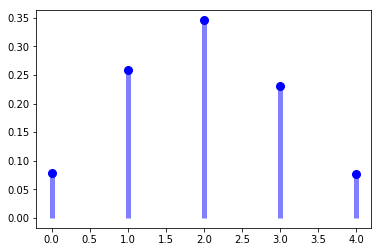

In [9]:
from scipy.stats import binom
fig,ax = plt.subplots(1,1)
n,p = 5,0.4
x = np.arange(binom.ppf(0.01,n,p),binom.ppf(0.99,n,p))
ax.plot(x,binom.pmf(x,n,p),'bo',ms = 8,label = 'binom pmf')
ax.vlines(x,0,binom.pmf(x,n,p),color ='b',lw = 5,alpha = 0.5)


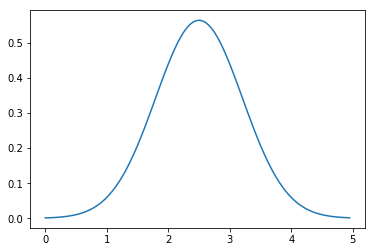

In [47]:
from scipy.stats import multivariate_normal
x = np.linspace(0,5,100,endpoint=False)
y = multivariate_normal.pdf(x,mean=2.5,cov=0.5)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x,y)

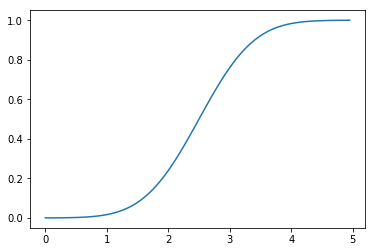

In [48]:
from scipy.stats import multivariate_normal
x = np.linspace(0,5,100,endpoint=False)
y = multivariate_normal.cdf(x,mean=2.5,cov=0.5)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x,y)

In [49]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95])

In [11]:
import pandas_datareader.data as web
import datetime
symbol = 'WIKI/AAPL'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 27)
#f = web.DataReader('F', ‘yahoo’, start, end)
GOOG = web.get_data_yahoo('GOOG')
AAPL = web.get_data_yahoo('AAPL')
INPX = web.get_data_yahoo('INPX')

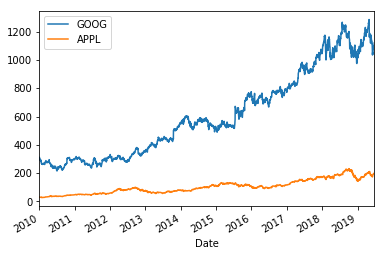

In [19]:
GOOG['Close'].plot()
AAPL['Close'].plot()

plt.legend(['GOOG','APPL'])


/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, 

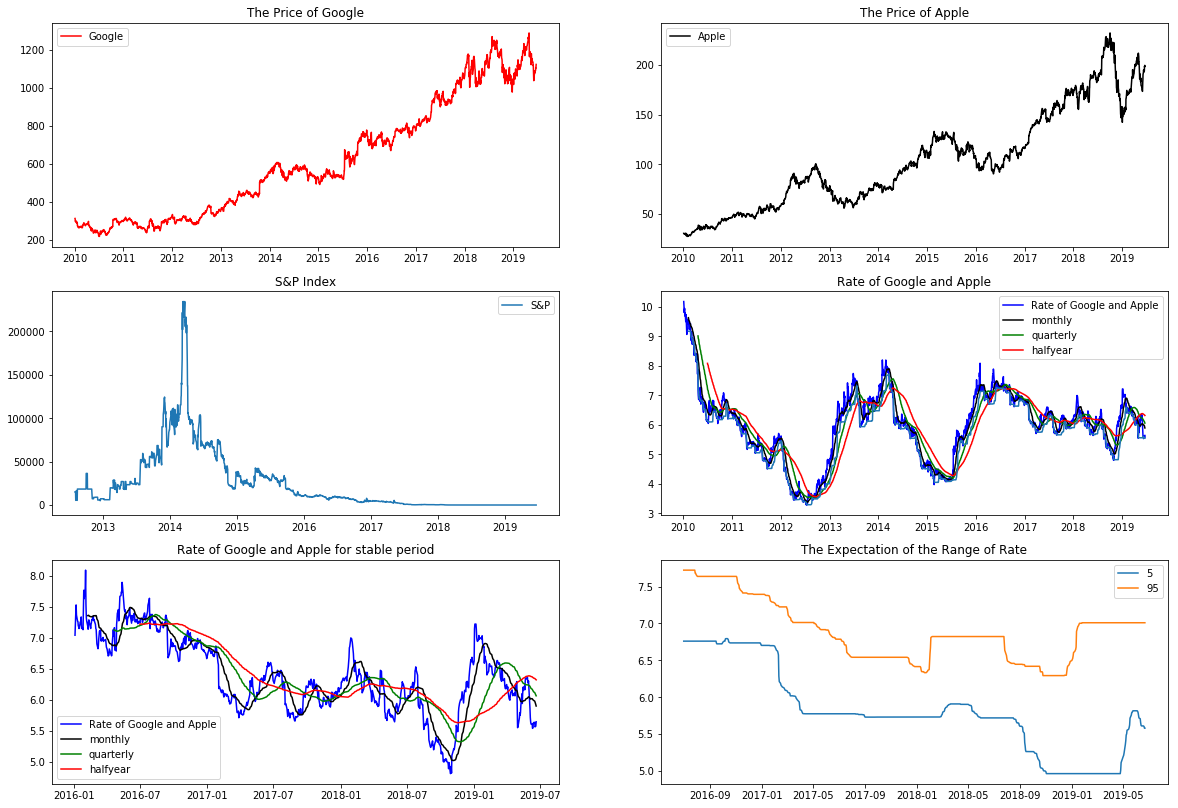

In [7]:
import pandas_datareader.data as web
import datetime
symbol = 'WIKI/AAPL'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 27)
#f = web.DataReader('F', ‘yahoo’, start, end)
GOOG = web.get_data_yahoo('GOOG')
AAPL = web.get_data_yahoo('AAPL')
INPX = web.get_data_yahoo('INPX')

fig = plt.figure(figsize = (20,14))
a = fig.add_subplot(3,2,1)
b = fig.add_subplot(3,2,2)
c = fig.add_subplot(3,2,3)
d = fig.add_subplot(3,2,4)
e = fig.add_subplot(3,2,5)
f = fig.add_subplot(3,2,6)

a.plot(GOOG['Close'],color = 'r')
b.plot(AAPL['Close'],color = 'black')
c.plot(INPX['Close'])
c.plot(y = 15000)

rate = GOOG['Close']/AAPL['Close']
d.plot(rate,color = 'blue')
d.plot(rate.rolling(25).mean(),color = 'black')
d.plot(rate.rolling(75).mean(),color = 'green')
d.plot(rate.rolling(125).mean(),color = 'red')
d.plot(rate.rolling(25).apply(lambda x : np.percentile(x,5)))

GOOG['Close'] = GOOG['Close']['2016-01-04':]
rate = GOOG['Close']/AAPL['Close']
e.plot(rate,color = 'blue')
e.plot(rate.rolling(25).mean(),color = 'black')
e.plot(rate.rolling(75).mean(),color = 'green')
e.plot(rate.rolling(125).mean(),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,5)))
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,95)))


a.legend(['Google'])
b.legend (['Apple'])
c.legend (['S&P'])
d.legend(['Rate of Google and Apple','monthly','quarterly','halfyear'])
e.legend(['Rate of Google and Apple','monthly','quarterly','halfyear'])
f.legend(['5','95'])

a.title.set_text('The Price of Google')
b.title.set_text('The Price of Apple')
c.title.set_text('S&P Index')
d.title.set_text('Rate of Google and Apple')
e.title.set_text('Rate of Google and Apple for stable period')
f.title.set_text('The Expectation of the Range of Rate')
#plt.savefig('C:\Users\Administrator\Desktop\info.png')
#plt.savefig('C:\Users\Administrator\Desktop','googleVSapple')
plt.savefig('GoogleVSApple')

In [8]:
rate.mean()

6.386536147799172

/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, 

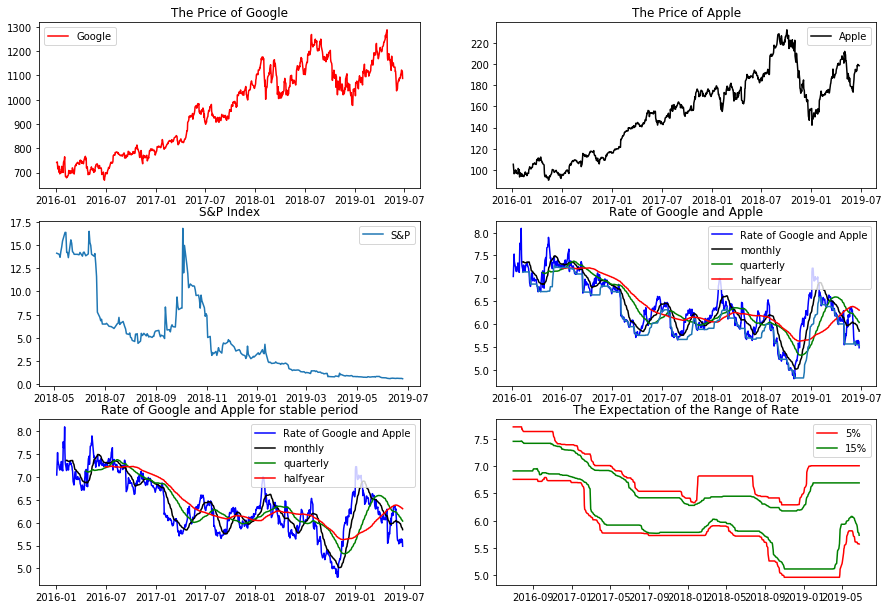

In [8]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np

symbol = 'WIKI/AAPL'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 27)
#f = web.DataReader('F', ‘yahoo’, start, end)
GOOG = web.get_data_yahoo('GOOG')
AAPL = web.get_data_yahoo('AAPL')
INPX = web.get_data_yahoo('INPX')

fig = plt.figure(figsize = (15,14))
a = fig.add_subplot(4,2,1)
b = fig.add_subplot(4,2,2)
c = fig.add_subplot(4,2,3)
d = fig.add_subplot(4,2,4)
e = fig.add_subplot(4,2,5)
f = fig.add_subplot(4,2,6)
#g = fig.add_subplot(4,2,7)

GOOG['Close'] = GOOG['Close']['2016-01-04':]
AAPL['Close'] = AAPL['Close']['2016-01-04':]
INPX['Close'] = INPX['Close']['2018-05-04':]


a.plot(GOOG['Close'],color = 'r')
b.plot(AAPL['Close'],color = 'black')
c.plot(INPX['Close'])
c.plot(y = 15000)

rate = GOOG['Close']/AAPL['Close']
d.plot(rate,color = 'blue')
d.plot(rate.rolling(25).mean(),color = 'black')
d.plot(rate.rolling(75).mean(),color = 'green')
d.plot(rate.rolling(125).mean(),color = 'red')
d.plot(rate.rolling(25).apply(lambda x : np.percentile(x,5)))

GOOG['Close'] = GOOG['Close']['2016-01-04':]
rate = GOOG['Close']/AAPL['Close']
e.plot(rate,color = 'blue')
e.plot(rate.rolling(25).mean(),color = 'black')
e.plot(rate.rolling(75).mean(),color = 'green')
e.plot(rate.rolling(125).mean(),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,5)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,15)),color = 'green')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,95)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,85)),color = 'green')

a.legend(['Google'])
b.legend (['Apple'])
c.legend (['S&P'])
d.legend(['Rate of Google and Apple','monthly','quarterly','halfyear'])
e.legend(['Rate of Google and Apple','monthly','quarterly','halfyear'])
f.legend(['5%','15%'])

a.title.set_text('The Price of Google')
b.title.set_text('The Price of Apple')
c.title.set_text('S&P Index')
d.title.set_text('Rate of Google and Apple')
e.title.set_text('Rate of Google and Apple for stable period')
f.title.set_text('The Expectation of the Range of Rate')
#plt.savefig('C:\Users\Administrator\Desktop\info.png')
#plt.savefig('C:\Users\Administrator\Desktop','googleVSapple')
plt.savefig('GoogleVSApple')

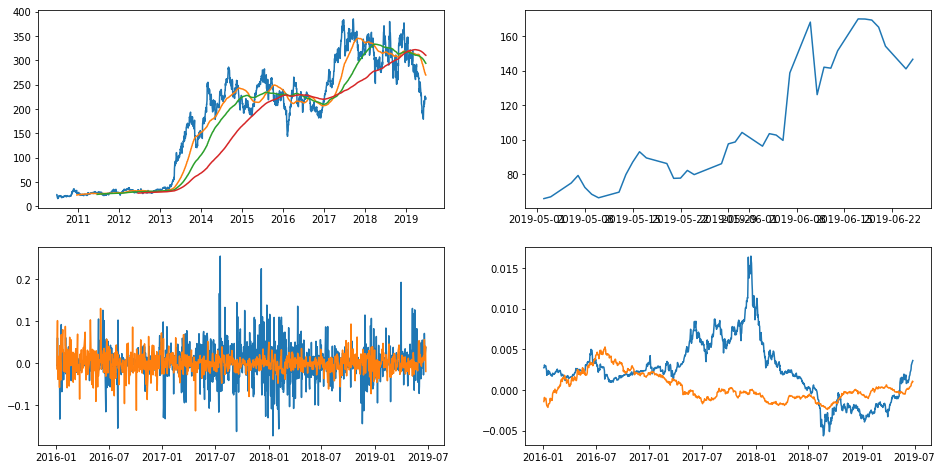

In [5]:
fig = plt.figure(figsize=(16,8))

a = fig.add_subplot(221)
b = fig.add_subplot(222)
c = fig.add_subplot(223)
d = fig.add_subplot(224)

a.plot(web.get_data_yahoo('TSLA')['Close'])
a.plot(web.get_data_yahoo('TSLA')['Close'].rolling(125).mean())
a.plot(web.get_data_yahoo('TSLA')['Close'].rolling(250).mean())
a.plot(web.get_data_yahoo('TSLA')['Close'].rolling(500).mean())

b.plot(web.get_data_yahoo('BYND')['Close'])
b.plot(web.get_data_yahoo('BYND')['Close'].rolling(125).mean())
b.plot(web.get_data_yahoo('BYND')['Close'].rolling(250).mean())
b.plot(web.get_data_yahoo('BYND')['Close'].rolling(500).mean())


c.plot(web.get_data_yahoo('BTC-USD')['Close']['2016-01-04':].pct_change())
c.plot(web.get_data_yahoo('GOLD')['Close']['2016-01-04':].pct_change())

d.plot(web.get_data_yahoo('BTC-USD')['Close'].rolling(250).mean()['2016-01-04':].pct_change())
d.plot(web.get_data_yahoo('GOLD')['Close'].rolling(250).mean()['2016-01-04':].pct_change())

#d.plot(web.get_data_yahoo('')['Close'].rolling(125).mean()['2016-01-04':])

#c.plot(web.get_data_yahoo('TSLA')['Close'].rolling(250).mean())
#c.plot(web.get_data_yahoo('TSLA')['Close'].rolling(500).mean())
# web.get_data_yahoo('BYND')['Close'].plot()
# web.get_data_yahoo('NASDAQ')['Close'].plot()


In [1]:
import mpl_finance as mpf 

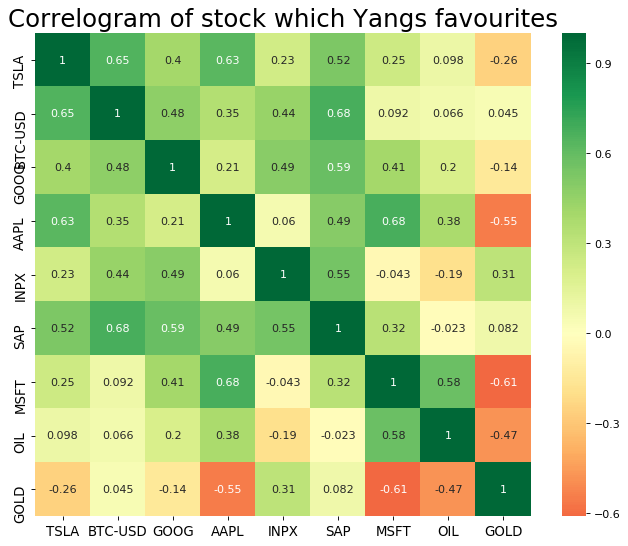

In [47]:
a = pd.DataFrame(web.get_data_yahoo('TSLA')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
b = pd.DataFrame(web.get_data_yahoo('BTC-USD')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
c = pd.DataFrame(web.get_data_yahoo('GOOG')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
d = pd.DataFrame(web.get_data_yahoo('AAPL')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
e = pd.DataFrame(web.get_data_yahoo('INPX')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
f = pd.DataFrame(web.get_data_yahoo('SAP')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
g = pd.DataFrame(web.get_data_yahoo('MSFT')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
h = pd.DataFrame(web.get_data_yahoo('OIL')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())
i = pd.DataFrame(web.get_data_yahoo('GOLD')['Close'].rolling(250).mean()['2016-01-04':].pct_change().dropna())

end = pd.merge(a,b,on = 'Date')
end = pd.merge(end,c,on = 'Date')
end = pd.merge(end,d,on = 'Date')
end = pd.merge(end,e,on = 'Date')
end = pd.merge(end,f,on = 'Date')
end = pd.merge(end,g,on = 'Date')
end = pd.merge(end,h,on = 'Date')
df = pd.merge(end,i,on = 'Date')
df.columns =['TSLA','BTC-USD','GOOG','AAPL','INPX','SAP','MSFT','OIL','GOLD']

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn',center=0, annot=True)

# Decorations
plt.title('Correlogram of stock which Yangs favourites', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Users/yangyihang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, 

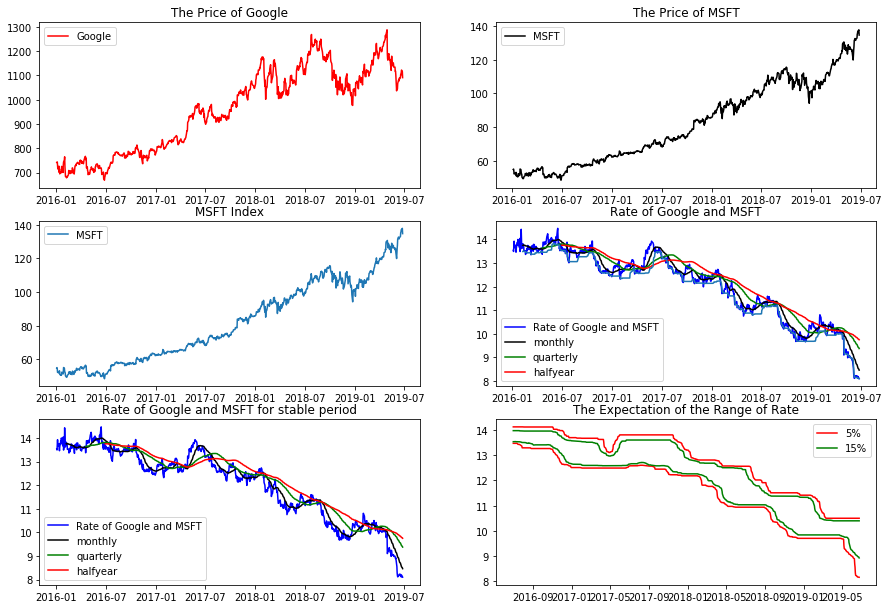

In [2]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np

symbol = 'WIKI/AAPL'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 27)
#f = web.DataReader('F', ‘yahoo’, start, end)
GOOG = web.get_data_yahoo('GOOG')
AAPL = web.get_data_yahoo('AAPL')
INPX = web.get_data_yahoo('INPX')
MSFT = web.get_data_yahoo('MSFT')


fig = plt.figure(figsize = (15,14))
a = fig.add_subplot(4,2,1)
b = fig.add_subplot(4,2,2)
c = fig.add_subplot(4,2,3)
d = fig.add_subplot(4,2,4)
e = fig.add_subplot(4,2,5)
f = fig.add_subplot(4,2,6)
#g = fig.add_subplot(4,2,7)

GOOG['Close'] = GOOG['Close']['2016-01-04':]
AAPL['Close'] = AAPL['Close']['2016-01-04':]
MSFT['Close'] = MSFT['Close']['2016-01-04':]
INPX['Close'] = INPX['Close']['2016-05-04':]


a.plot(GOOG['Close'],color = 'r')
b.plot(MSFT['Close'],color = 'black')
c.plot(MSFT['Close'])
c.plot(y = 15000)

rate = GOOG['Close']/MSFT['Close']
d.plot(rate,color = 'blue')
d.plot(rate.rolling(25).mean(),color = 'black')
d.plot(rate.rolling(75).mean(),color = 'green')
d.plot(rate.rolling(125).mean(),color = 'red')
d.plot(rate.rolling(25).apply(lambda x : np.percentile(x,5)))

GOOG['Close'] = GOOG['Close']['2016-01-04':]
rate = GOOG['Close']/MSFT['Close']
e.plot(rate,color = 'blue')
e.plot(rate.rolling(25).mean(),color = 'black')
e.plot(rate.rolling(75).mean(),color = 'green')
e.plot(rate.rolling(125).mean(),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,5)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,15)),color = 'green')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,95)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,85)),color = 'green')

a.legend(['Google'])
b.legend (['MSFT'])
c.legend (['MSFT'])
d.legend(['Rate of Google and MSFT','monthly','quarterly','halfyear'])
e.legend(['Rate of Google and MSFT','monthly','quarterly','halfyear'])
f.legend(['5%','15%'])

a.title.set_text('The Price of Google')
b.title.set_text('The Price of MSFT')
c.title.set_text('MSFT Index')
d.title.set_text('Rate of Google and MSFT')
e.title.set_text('Rate of Google and MSFT for stable period')
f.title.set_text('The Expectation of the Range of Rate')
#plt.savefig('C:\Users\Administrator\Desktop\info.png')
#plt.savefig('C:\Users\Administrator\Desktop','googleVSapple')
plt.savefig('GoogleVSApple')

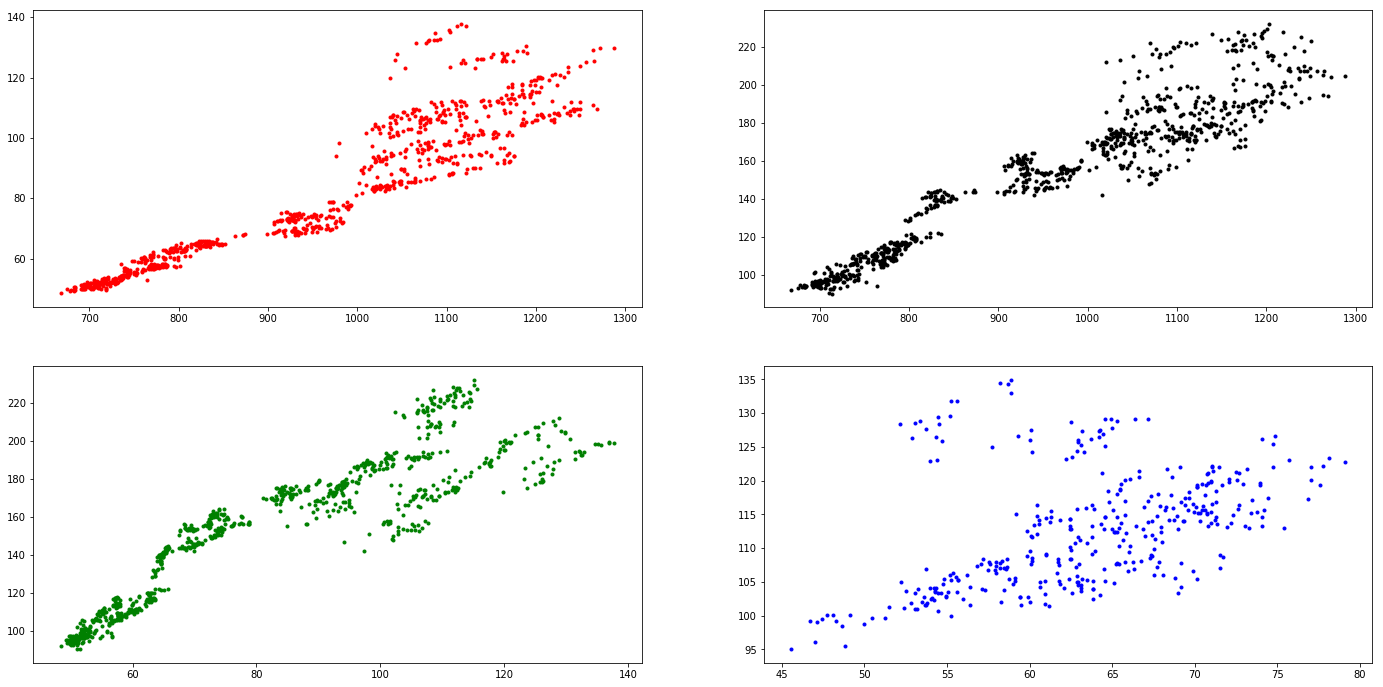

In [63]:
fig = plt.figure(figsize = (24,12))
a = fig.add_subplot(2,2,1)
b = fig.add_subplot(2,2,2)
c = fig.add_subplot(2,2,3)
d = fig.add_subplot(2,2,4)




OIL = web.get_data_yahoo('OIL')
SAP = web.get_data_yahoo('SAP')

a.scatter(GOOG['Close']['2016-01-04':],MSFT['Close']['2016-01-04':],color = 'red',marker =".")
b.scatter(GOOG['Close']['2016-01-04':],AAPL['Close']['2016-01-04':],color = 'black',marker =".")
c.scatter(MSFT['Close']['2016-01-04':],AAPL['Close']['2016-01-04':],color = 'green',marker =".")
d.scatter(OIL['Close']['2018-01-04':],SAP['Close']['2018-01-04':],color = "blue",marker = ".")




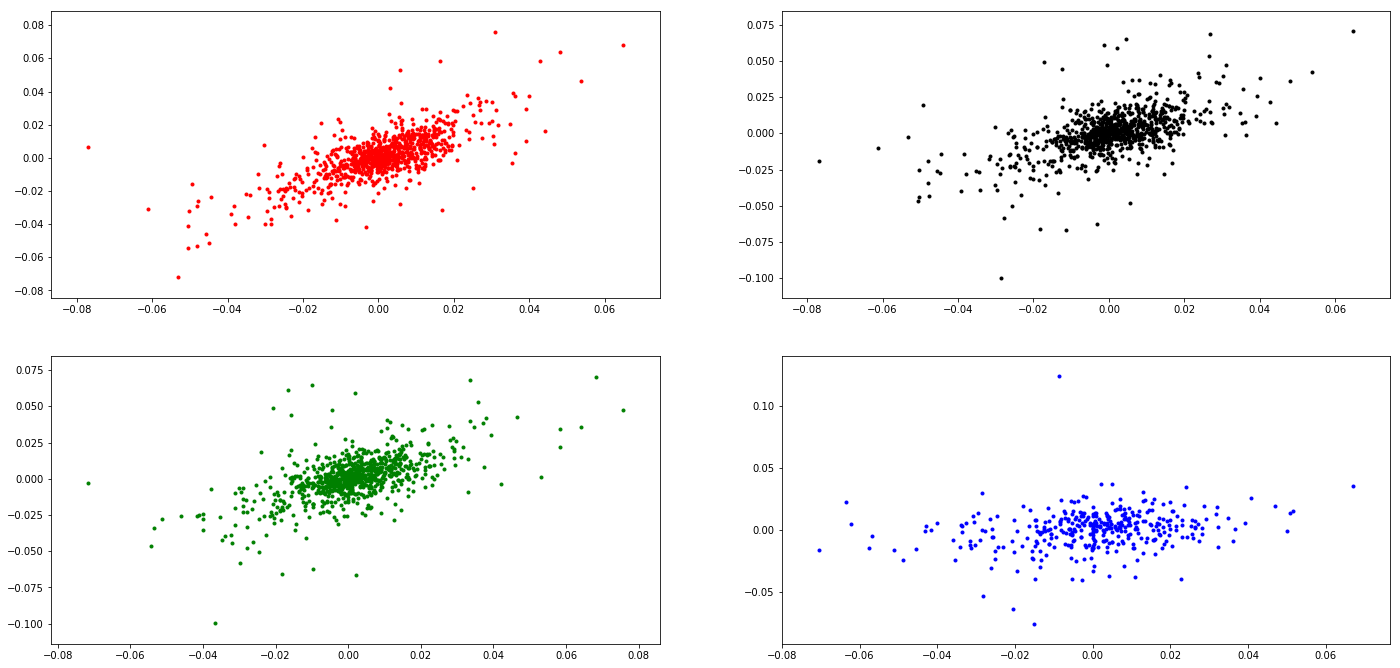

In [50]:
fig = plt.figure(figsize = (24,18))
a = fig.add_subplot(3,2,1)
b = fig.add_subplot(3,2,2)
c = fig.add_subplot(3,2,3)
d = fig.add_subplot(3,2,4)

OIL = web.get_data_yahoo('OIL')
SAP = web.get_data_yahoo('SAP')

a.scatter(GOOG['Close']['2016-01-04':].pct_change().dropna(),MSFT['Close']['2016-01-04':].pct_change().dropna(),color = 'red',marker =".")
b.scatter(GOOG['Close']['2016-01-04':].pct_change().dropna(),AAPL['Close']['2016-01-04':].pct_change().dropna(),color = 'black',marker =".")
c.scatter(MSFT['Close']['2016-01-04':].pct_change().dropna(),AAPL['Close']['2016-01-04':].pct_change().dropna(),color = 'green',marker =".")
d.scatter(OIL['Close']['2018-01-04':].pct_change().dropna(),SAP['Close']['2018-01-04':].pct_change().dropna(),color = "blue",marker = ".")

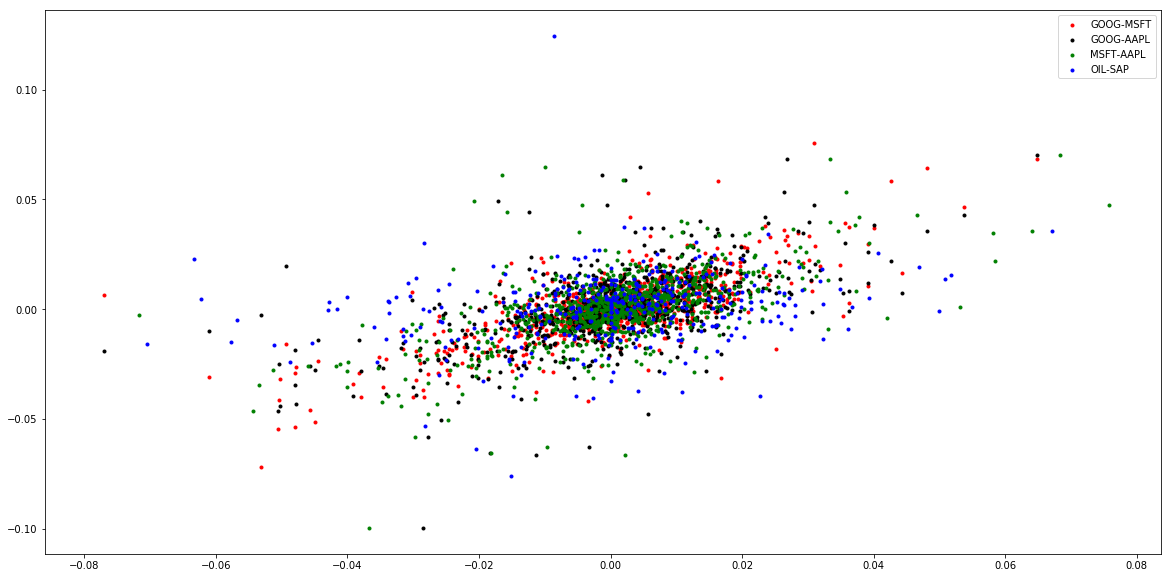

In [66]:
plt.figure(figsize = (20,10))

plt.scatter(GOOG['Close']['2016-01-04':].pct_change().dropna(),MSFT['Close']['2016-01-04':].pct_change().dropna(),color = 'red',marker =".")
plt.scatter(GOOG['Close']['2016-01-04':].pct_change().dropna(),AAPL['Close']['2016-01-04':].pct_change().dropna(),color = 'black',marker =".")
plt.scatter(MSFT['Close']['2016-01-04':].pct_change().dropna(),AAPL['Close']['2016-01-04':].pct_change().dropna(),color = 'green',marker =".")
plt.scatter(OIL['Close']['2018-01-04':].pct_change().dropna(),SAP['Close']['2018-01-04':].pct_change().dropna(),color = "blue",marker = ".")

plt.legend(["GOOG-MSFT","GOOG-AAPL","MSFT-AAPL","OIL-SAP",])